In [1]:
# import libraries we'll use
import spacy # fast NLP
from spacy.lang.pl import Polish
from spacy.lang.de import German
import pandas as pd # dataframes
import numpy as np
import nltk
import textblob
import langid # language identification (i.e. what language is this?)
from nltk.classify.textcat import TextCat # language identification from NLTK
from matplotlib.pyplot import plot # not as good as ggplot in R :p

In [2]:
data = pd.read_json('c:/Users/slavina/Downloads/work/work/data/odra/de/newsProc.result.json', encoding='utf8')
data.head()

,id,headline,textBody,source,sourceName,author,topic,link,crawlDate,creationDate
0,3110,George Soros lobte im Vorfeld der Wahl „Sardin...,"Der Vorsitzende der italienischen Lega, Matteo...",https://www.epochtimes.de/,epoch,Von Reinhard Werner,Deutschland Unternehmen Reise Deutschland Chin...,https://www.epochtimes.de/politik/europa/patt-...,1580127189000,27. Januar 2020
1,3069,Söder: Der Kurs des rechten Flügels ist die „V...,75 Jahre nach der Befreiung des Vernichtungsla...,https://www.epochtimes.de/,epoch,Epoch Times,Deutschland Unternehmen Reise Deutschland Chin...,https://www.epochtimes.de/politik/deutschland/...,1580123385000,27. Januar 2020
2,3070,Eine Buchempfehlung vom Verlag der Epoch Times,Polizei-Auto.Foto: iStock Die nordrhein-westfä...,https://www.epochtimes.de/,epoch,Epoch Times,Deutschland Unternehmen Reise Deutschland Chin...,https://www.epochtimes.de/politik/deutschland/...,1580123385000,27. Januar 2020
3,3071,Zahl der Solo-Selbstständigen rückläufig,In Deutschland hatten zuletzt rund 764.000 Erw...,https://www.epochtimes.de/,epoch,Epoch Times,Deutschland Unternehmen Reise Deutschland Chin...,https://www.epochtimes.de/politik/deutschland/...,1580123385000,27. Januar 2020
4,3072,Bitte um Privatsphäre,Superstar Kobe Bryant mit Tochter Gianna Maria...,https://www.epochtimes.de/,epoch,Epoch Times,Deutschland Unternehmen Reise Deutschland Chin...,https://www.epochtimes.de/sport/basketball/tod...,1580123385000,27. Januar 2020


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2568 entries, 0 to 2567
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            2568 non-null   int64 
 1   headline      2568 non-null   object
 2   textBody      2568 non-null   object
 3   source        2568 non-null   object
 4   sourceName    2568 non-null   object
 5   author        2568 non-null   object
 6   topic         2568 non-null   object
 7   link          2568 non-null   object
 8   crawlDate     2568 non-null   int64 
 9   creationDate  498 non-null    object
dtypes: int64(2), object(8)
memory usage: 200.8+ KB


In [4]:
data = data[data['topic'].str.split().str.len().lt(10)]
data.tail()

,id,headline,textBody,source,sourceName,author,topic,link,crawlDate,creationDate
2563,1204,Die neuen Entdecker,"Wir waren von einem Nebel umhüllt, der uns nur...",https://www.faz.net/aktuell/,faz,Alexander Armbruster,Netzkonferenz DLD,https://www.faz.net/aktuell/wirtschaft/netzkon...,1579598618000,None
2564,1196,Sinnsuche in einer Welt der Unrast,Unter den rund 2000 Gästen des Weltwirtschafts...,https://www.faz.net/aktuell/,faz,Gerald Braunberger Davos,Weltwirtschaftsforum,https://www.faz.net/aktuell/wirtschaft/weltwir...,1579598617000,None
2565,1197,Deutsche zweifeln am Kapitalismus,"Viele Menschen in Deutschland glauben nicht, d...",https://www.faz.net/aktuell/,faz,Sven Astheimer Davos,Weltwirtschaftsforum,https://www.faz.net/aktuell/wirtschaft/weltwir...,1579598617000,None
2566,1198,Iran bestätigt Abschuss mit zwei Raketen,Das irrtümlich in Iran abgeschossene ukrainisc...,https://www.faz.net/aktuell/,faz,,Ausland,https://www.faz.net/aktuell/politik/ausland/fl...,1579598617000,None
2567,1199,Nimm den Bus oder die Axt,"Die Kollegen sagen, ich käme aus „Nochnichtmal...",https://www.faz.net/aktuell/,faz,Axel Weidemann,Medien,https://www.faz.net/aktuell/feuilleton/medien/...,1579598617000,None


In [5]:
t = data.topic.str.split(expand=True).stack()
shorttopic = t.loc[t.str.len() <= 10].groupby(level=0).apply(' '.join)

In [6]:
data.fillna('none')

,id,headline,textBody,source,sourceName,author,topic,link,crawlDate,creationDate
7,3067,"Auschwitz und Flossenbürg: 1,2 Millionen Mensc...",,https://www.epochtimes.de/,epoch,,,https://www.epochtimes.de/wissen/forschung,1580123384000,
176,1584,Senat beginnt Debatte in Impeachment-Prozess g...,,https://www.epochtimes.de/,epoch,,,https://www.epochtimes.de/politik/welt,1579648180000,
209,1384,Italien: Senats-Ausschuss stimmt für Aufhebung...,,https://www.epochtimes.de/,epoch,,,https://www.epochtimes.de/politik/europa,1579604990000,
220,1292,„Ein Schlag ins Gesicht der Imker“: Behauptung...,,https://www.epochtimes.de/,epoch,,,https://www.epochtimes.de/politik/deutschland,1579599115000,
221,1293,Solar-Lobbyist will Klima-Skeptiker durch Haft...,,https://www.epochtimes.de/,epoch,,,https://www.epochtimes.de/umwelt/klima,1579599115000,
...,...,...,...,...,...,...,...,...,...,...
2563,1204,Die neuen Entdecker,"Wir waren von einem Nebel umhüllt, der uns nur...",https://www.faz.net/aktuell/,faz,Alexander Armbruster,Netzkonferenz DLD,https://www.faz.net/aktuell/wirtschaft/netzkon...,1579598618000,none
2564,1196,Sinnsuche in einer Welt der Unrast,Unter den rund 2000 Gästen des Weltwirtschafts...,https://www.faz.net/aktuell/,faz,Gerald Braunberger Davos,Weltwirtschaftsforum,https://www.faz.net/aktuell/wirtschaft/weltwir...,1579598617000,none
2565,1197,Deutsche zweifeln am Kapitalismus,"Viele Menschen in Deutschland glauben nicht, d...",https://www.faz.net/aktuell/,faz,Sven Astheimer Davos,Weltwirtschaftsforum,https://www.faz.net/aktuell/wirtschaft/weltwir...,1579598617000,none
2566,1198,Iran bestätigt Abschuss mit zwei Raketen,Das irrtümlich in Iran abgeschossene ukrainisc...,https://www.faz.net/aktuell/,faz,,Ausland,https://www.faz.net/aktuell/politik/ausland/fl...,1579598617000,none


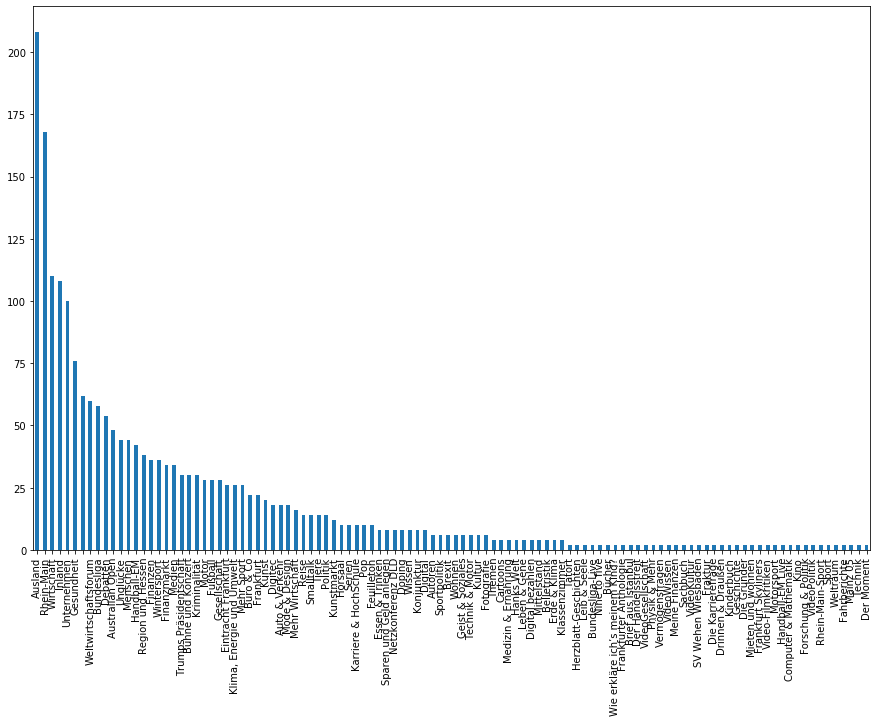

In [7]:
data['topic'].value_counts().plot( kind='bar', figsize=(15,10))

In [8]:
raw_data = data

reindexed_data = raw_data['headline']
reindexed_data.index = raw_data['topic']

raw_data.head()

,id,headline,textBody,source,sourceName,author,topic,link,crawlDate,creationDate
7,3067,"Auschwitz und Flossenbürg: 1,2 Millionen Mensc...",,https://www.epochtimes.de/,epoch,,,https://www.epochtimes.de/wissen/forschung,1580123384000,
176,1584,Senat beginnt Debatte in Impeachment-Prozess g...,,https://www.epochtimes.de/,epoch,,,https://www.epochtimes.de/politik/welt,1579648180000,
209,1384,Italien: Senats-Ausschuss stimmt für Aufhebung...,,https://www.epochtimes.de/,epoch,,,https://www.epochtimes.de/politik/europa,1579604990000,
220,1292,„Ein Schlag ins Gesicht der Imker“: Behauptung...,,https://www.epochtimes.de/,epoch,,,https://www.epochtimes.de/politik/deutschland,1579599115000,
221,1293,Solar-Lobbyist will Klima-Skeptiker durch Haft...,,https://www.epochtimes.de/,epoch,,,https://www.epochtimes.de/umwelt/klima,1579599115000,


In [ ]:
# Define helper functions
def get_top_n_words(n_top_words, count_vectorizer, text_data, encoding ='UTF-8'):
    '''
    returns a tuple of the top n words in a sample and their 
    accompanying counts, given a CountVectorizer object and text sample
    '''
    vectorized_headlines = count_vectorizer.fit_transform(text_data.values)
    vectorized_total = np.sum(vectorized_headlines, axis=0)
    word_indices = np.flip(np.argsort(vectorized_total)[0,:], 1)
    word_values = np.flip(np.sort(vectorized_total)[0,:],1)
    
    word_vectors = np.zeros((n_top_words, vectorized_headlines.shape[1]))
    for i in range(n_top_words):
        word_vectors[i,word_indices[0,i]] = 1

    words = [word[0].encode('utf-8').decode('utf-8') for 
             word in count_vectorizer.inverse_transform(word_vectors)]

    return (words, word_values[0,:n_top_words].tolist()[0])

In [9]:
from sklearn.feature_extraction.text import CountVectorizer
from textblob import TextBlob
import scipy.stats as stats
from stop_words import get_stop_words

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sb

from bokeh.plotting import figure, output_file, show
from bokeh.models import Label
from bokeh.io import output_notebook
output_notebook()

%matplotlib inline

stop_words = get_stop_words('german')

count_vectorizer = CountVectorizer(stop_words = get_stop_words('german'))
words, word_values = get_top_n_words(n_top_words=15,
                                     count_vectorizer=count_vectorizer, 
                                     text_data=reindexed_data)

fig, ax = plt.subplots(figsize=(16,8))
ax.bar(range(len(words)), word_values);
ax.set_xticks(range(len(words)));
ax.set_xticklabels(words, rotation='vertical');
ax.set_title('Top words in headlines dataset (excluding stop words)');
ax.set_xlabel('Word');
ax.set_ylabel('Number of occurences');
plt.show()

Loading BokehJS ...

NameError: name 'get_top_n_words' is not defined

In [10]:
#category to id

categories = data.groupby('topic').size().index.tolist()
category_int = {}
int_category = {}
for i, k in enumerate(categories):
    category_int.update({k:i})
    int_category.update({i:k})
    
data['c2id'] = data['topic'].apply(lambda x: category_int[x])

In [11]:
from keras.preprocessing.text import Tokenizer, text_to_word_sequence

#tokenizing

tokenizer = Tokenizer()
tokenizer.fit_on_texts(data.headline)
X = tokenizer.texts_to_sequences(data.headline)
data['headline'] = X


Using TensorFlow backend.


In [12]:
data.headline.describe()

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 1652, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


count     2088
unique     926
top         []
freq        44
Name: headline, dtype: object

In [13]:
word_index = tokenizer.word_index

EMBEDDING_DIM = 100

embeddings_index = {}
f = open ('c:/Users/slavina/input/glove-global-vectors-for-word-representation/glove.6B.100d.txt', encoding="utf8")
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='object')
    embeddings_index[word] = coefs
f.close

print('Found %s unique tokens.' % len(word_index))
print('Total %s word vectors.' % len(embeddings_index))

Found 2568 unique tokens.
Total 400000 word vectors.


In [33]:
from keras.layers import Dropout, Embedding, GlobalMaxPooling1D, MaxPooling1D, Add, Flatten, SpatialDropout1D
from keras.initializers import Constant#using 50 for padding length
from keras.preprocessing import sequence

maxlen = 50
X = tuple(sequence.pad_sequences(data.headline, maxlen=maxlen))

In [15]:



embedding_matrix = np.zeros((len(word_index) + 1, EMBEDDING_DIM))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None: 
        embedding_matrix[i] = embedding_vector
        
embedding_layer = Embedding(len(word_index)+1,
                            EMBEDDING_DIM,
                            embeddings_initializer=Constant(embedding_matrix),
                            input_length=maxlen,
                            trainable=False)

In [24]:
from keras.utils import np_utils

#prepared data

X = np.array(X)
Y = np_utils.to_categorical(tuple(data.c2id))

In [25]:
from sklearn.model_selection import train_test_split
#split to training set and validation set

seed = 29
x_train, x_val, y_train, y_val = train_test_split(X, Y, test_size=0.2, random_state=seed)

In [26]:
from keras.layers import Dense, Input, LSTM, Bidirectional, Activation, Conv1D, GRU, TimeDistributed
from keras.layers import Dropout, Embedding, GlobalMaxPooling1D, MaxPooling1D, Add, Flatten, SpatialDropout1D
from keras.layers import GlobalAveragePooling1D, BatchNormalization, concatenate
from keras.layers import Reshape, merge, Concatenate, Lambda, Average
from keras.models import Sequential, Model, load_model

from keras import backend as K
from keras.engine.topology import Layer

# Bidirectional LSTM with convolution
# from https://www.kaggle.com/eashish/bidirectional-gru-with-convolution

inp = Input(shape=(maxlen,), dtype='int32')
x = embedding_layer(inp)
x = SpatialDropout1D(0.2)(x)
x = Bidirectional(GRU(128, return_sequences=True, dropout=0.1, recurrent_dropout=0.1))(x)
x = Conv1D(64, kernel_size=3)(x)
avg_pool = GlobalAveragePooling1D()(x)
max_pool = GlobalMaxPooling1D()(x)
x = concatenate([avg_pool, max_pool])
outp = Dense(len(int_category), activation="softmax")(x)

BiGRU = Model(inp, outp)
BiGRU.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

BiGRU.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 50)           0                                            
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 50, 100)      256900      input_2[0][0]                    
__________________________________________________________________________________________________
spatial_dropout1d_2 (SpatialDro (None, 50, 100)      0           embedding_1[1][0]                
__________________________________________________________________________________________________
bidirectional_2 (Bidirectional) (None, 50, 256)      175872      spatial_dropout1d_2[0][0]        
____________________________________________________________________________________________

In [27]:
#training

bigru_history = BiGRU.fit(x_train,
                         y_train,
                         batch_size=128,
                         epochs=10,
                         validation_data=(x_val, y_val))

Train on 1670 samples, validate on 418 samples
Epoch 1/10
1670/1670 [==============================] - 6s 3ms/step - loss: 4.4969 - accuracy: 0.0725 - val_loss: 4.1302 - val_accuracy: 0.0933
Epoch 2/10
1670/1670 [==============================] - 3s 2ms/step - loss: 4.0134 - accuracy: 0.1078 - val_loss: 3.9159 - val_accuracy: 0.1172
Epoch 3/10
1670/1670 [==============================] - 2s 1ms/step - loss: 3.8183 - accuracy: 0.1132 - val_loss: 3.8328 - val_accuracy: 0.1029
Epoch 4/10
1670/1670 [==============================] - 3s 1ms/step - loss: 3.6985 - accuracy: 0.1317 - val_loss: 3.7596 - val_accuracy: 0.1507
Epoch 5/10
1670/1670 [==============================] - 3s 2ms/step - loss: 3.6075 - accuracy: 0.1599 - val_loss: 3.7149 - val_accuracy: 0.1459
Epoch 6/10
1670/1670 [==============================] - 3s 2ms/step - loss: 3.5172 - accuracy: 0.1850 - val_loss: 3.6561 - val_accuracy: 0.1459
Epoch 7/10
1670/1670 [==============================] - 2s 1ms/step - loss: 3.3949 - accu

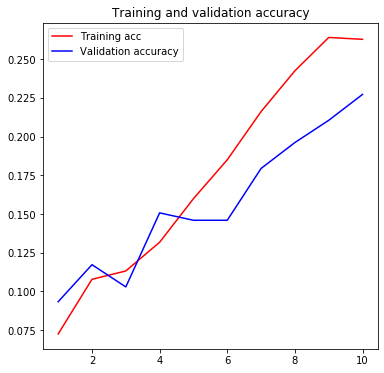

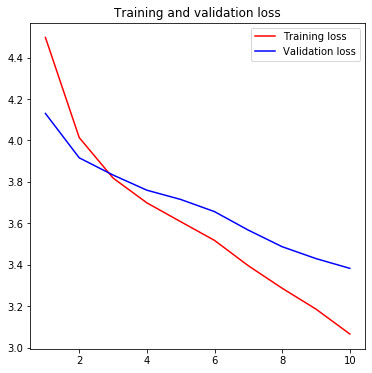

In [28]:
plt.rcParams['figure.figsize'] = (6,6)

accuracy = bigru_history.history['accuracy']
val_accuracy = bigru_history.history['val_accuracy']
loss = bigru_history.history['loss']
val_loss = bigru_history.history['val_loss']
epochs = range(1, len(accuracy) + 1)

plt.title('Training and validation accuracy')
plt.plot(epochs, accuracy, 'red', label='Training acc')
plt.plot(epochs, val_accuracy, 'blue', label='Validation accuracy')
plt.legend()

plt.figure()
plt.title('Training and validation loss')
plt.plot(epochs, loss, 'red', label='Training loss')
plt.plot(epochs, val_loss, 'blue', label='Validation loss')
plt.legend()

plt.show()

In [29]:
#evaluate accuracy

def evaluate_accuracy(model):
    predicted = model.predict(x_val)
    diff = y_val.argmax(axis=-1) - predicted.argmax(axis=-1)
    corrects = np.where(diff == 0)[0].shape[0]
    total = y_val.shape[0]
    return float(corrects/total)

In [30]:
print("model Bidirectional GRU + Conv:  %.6f" % evaluate_accuracy(BiGRU))

model Bidirectional GRU + Conv:  0.227273


In [31]:
import shap

# we use the first 100 training examples as our background dataset to integrate over
explainer = shap.DeepExplainer(BiGRU, x_train[:100])

# explain the first 10 predictions
# explaining each prediction requires 2 * background dataset size runs
shap_values = explainer.shap_values(x_test[:10])

ValueError: Layer model_2 was called with an input that isn't a symbolic tensor. Received type: <class 'numpy.ndarray'>. Full input: [array([[   0,    0,    0, ...,    9, 1405, 1406],
       [   0,    0,    0, ..., 2148,   14, 2149],
       [   0,    0,    0, ...,   96,    9, 1370],
       ...,
       [   0,    0,    0, ...,    3,  155,   22],
       [   0,    0,    0, ..., 2269,   21, 2270],
       [   0,    0,    0, ...,   26,  285,  286]])]. All inputs to the layer should be tensors.

In [32]:
from lime import lime_text
from sklearn.pipeline import make_pipeline
c = make_pipeline(vectorizer, nb)

NameError: name 'vectorizer' is not defined